
# Diseño de software para cómputo científico

----

## Unidad 3: Apache Parquet & Apache Arrow


## Apache Parquet (`.parquet`) 

- Apache Parquet es un **formato de almacenamiento** de **datos orientado a columnas** de código abierto y gratuito del ecosistema Apache Hadoop. 
- Es similar a los otros formatos de archivo de almacenamiento en columnas disponibles en Hadoop, a saber, RCFile y ORC. 
- Proporciona esquemas de codificación y compresión de datos eficientes con un rendimiento mejorado para manejar gran volumen de datos.
- Comenzó como un esfuerzo conjunto entre Twitter y Cloudera. 
- La primera versión, Apache Parquet 1.0, se lanzó en julio de 2013. 
- Desde el 27 de abril de 2015, Apache Parquet es un top-level Apache Software Foundation (ASF)-sponsored project.
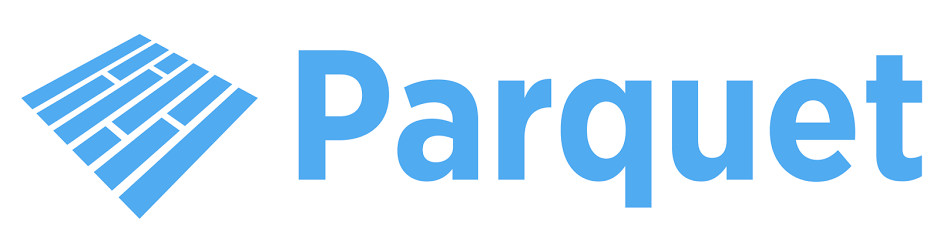


## Apache Arrow

- Apache Arrow es un framework de bajo nivel independiente del lenguaje para desarrollar aplicaciones de análisis de datos que procesan datos en columnas. 
- Contiene un **formato de memoria** estandarizado **orientado a columnas** para operaciones analíticas eficientes en hardware moderno de CPU y GPU. 
- Implementaciones: `C/C++`, `C#`, `Go`, `Java`, `JavaScript`, `MATLAB`, **`Python`**, `R`, `Ruby`, `Rust`
- Arrow está diseñado como complemento de *Parquet* para procesar datos en memoria; ya que las compensaciones de ingeniería de recursos de hardware para el procesamiento en memoria varían de las asociadas con el almacenamiento en disco. 
- Los proyectos Arrow y Parquet incluyen bibliotecas que permiten leer y escribir datos entre los dos formatos.

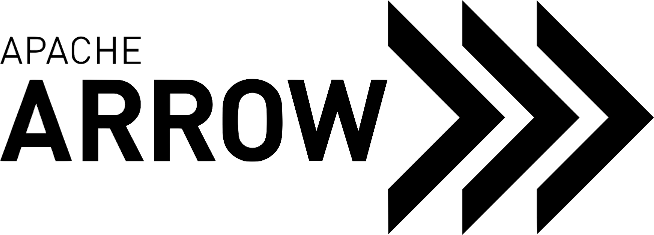

## La ventaja de Arrow

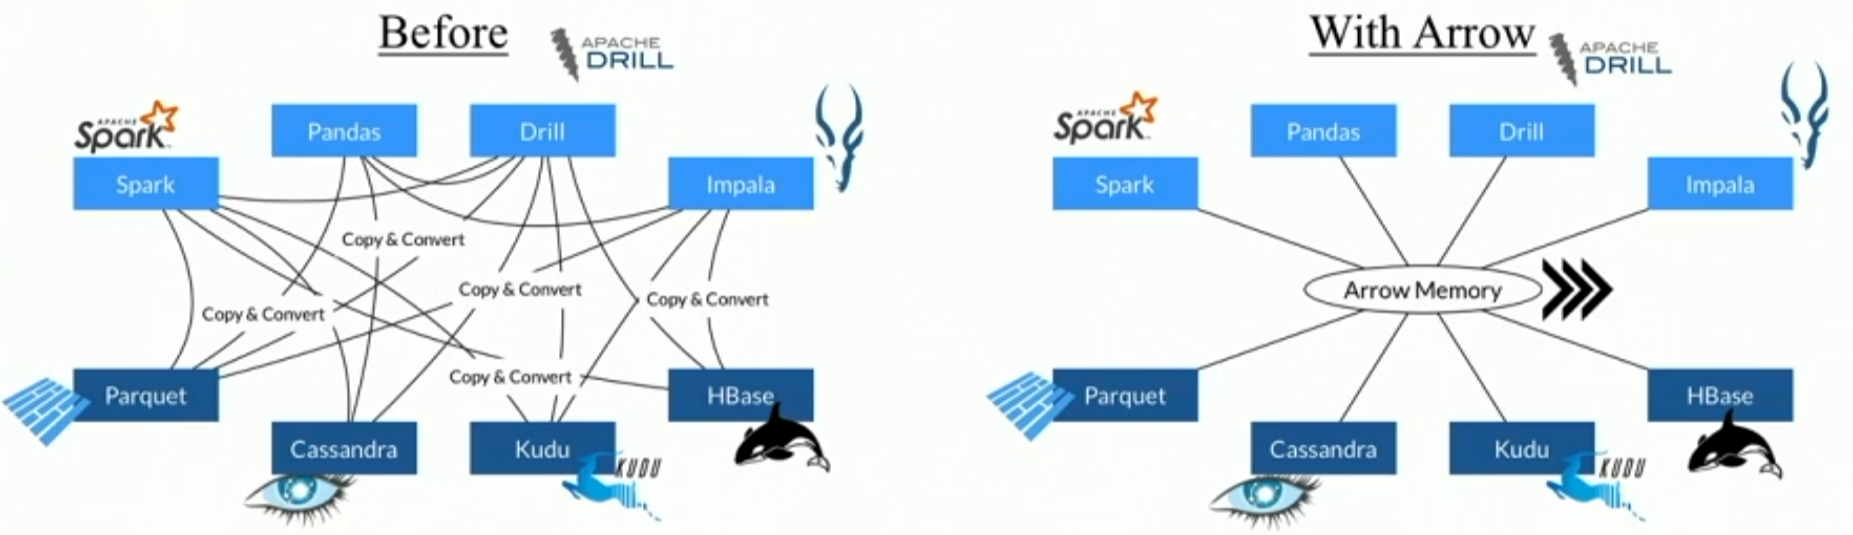

## Vamos con Pandas 

Pandas ofrece dos backends para acceder a arrow/parquet:

- `pyarrow`: Implementación de referencia de python. Wrapper de la librería de C++
- `fastparquet`: Implementación de alto desempeño pero con menos opciones.
- `auto`: Prefiere *pyarrow*, de lo contrario fallback a *fastparquet*

Como se usa

In [ ]:
!pip install pyarrow fastparquet

## Juguemos con datos

In [30]:
import carpyncho, pandas as pd  # pip install carpyncho
        
client = carpyncho.Carpyncho()
df = client.get_catalog("b278", "lc")

In [ ]:
df.info()

## Escritura

Un detalle, si quieren hacer muy muy multi-lenguage, pongan `compression=None`

In [8]:
#!rm -rf parquet
#!mkdir parquet

In [ ]:
%%time 
df.to_pickle("parquet/b278_lc.pkl")

In [ ]:
%%time
df.to_parquet("parquet/b278_lc.parquet.snp")  # usa una compression que se llama snappy

In [11]:
%%time
df.to_parquet("parquet/b278_lc.parquet.gz", compression="gzip", engine="fastparquet")

CPU times: user 2min 55s, sys: 3.82 s, total: 2min 59s
Wall time: 2min 59s


In [ ]:
%%time
df.to_parquet("parquet/b278_lc.parquet", compression=None, engine="fastparquet")

In [ ]:
!ls -lht parquet/b278_lc.*

## Lectura

In [ ]:
%%time 
df = pd.read_pickle("parquet/b278_lc.pkl")

In [ ]:
%%time 
df = pd.read_parquet("parquet/b278_lc.parquet", engine='pyarrow')

In [ ]:
%%time 
df = pd.read_parquet("parquet/b278_lc.parquet.snp", engine='pyarrow')

In [ ]:
%%time 
df = pd.read_parquet("parquet/b278_lc.parquet.gz", engine='fastparquet')